# Manejo de Errores

### Tracebacks
Un traceback es el cuerpo del texto que puede apuntar al origen (y al final) de un error no controlado.Hay maneras de controlar correctamente los errores para que no aparezcan o muestren información útil.


Los tracebacks casi siempre incluyen la información siguiente:

* Todas las rutas de acceso de archivo implicadas, para cada llamada a cada función.
* Los números de línea asociados a cada ruta de acceso de archivo.
* Los nombres de las funciones, métodos o clases implicados en la generación de una excepción.
* El nombre de la excepción que se ha producido.

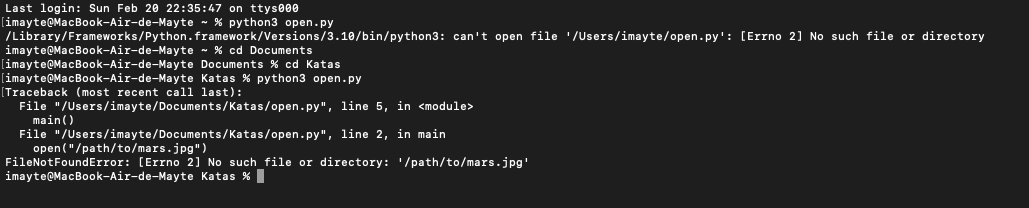

In [17]:
from IPython.display import Image
Image(filename='SS.png')

No es necesario detectar las excepciones todo el tiempo. A veces resulta útil permitir que se puedan generar excepciones para que otros autores de llamadas puedan tratar los errores.

## Try y Except los bloques



In [18]:
try:
    open('config.txt')
except FileNotFoundError:
    print("Couldn't find the config.text file!")

Couldn't find the config.text file!


Creando el archivo .txt

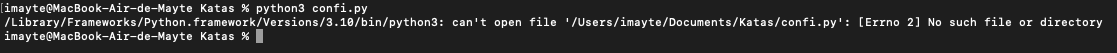

In [20]:
from IPython.display import Image
Image(filename='SS3.png')

Creando el archivo nos sale:


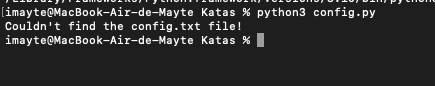

In [19]:
from IPython.display import Image
Image(filename='SS2.png')

Ver otros errores:

In [22]:
def main():
    try:
        configuration = open('config.txt')
    except FileNotFoundError:
        print("Couldn't find the config.txt file!")
    except IsADirectoryError:
        print("Found config.txt but it is a directory, couldn't read it")
    except (BlockingIOError, TimeoutError):
        print("Filesystem under heavy load, can't complete reading configuration file")

In [23]:
def main():
    try:
        configuration = open('config.txt')
    except FileNotFoundError:
        print("Couldn't find the config.txt file!")
    except IsADirectoryError:
        print("Found config.txt but it is a directory, couldn't read it")
    except (BlockingIOError, TimeoutError):
        print("Filesystem under heavy load, can't complete reading configuration file")

`as err` significa que `err` se convierte en una variable con el objeto de excepción como valor. Después, usa este valor para imprimir el mensaje de error asociado a la excepción.

### Generacion de excepciones
Los astronautas limitan su uso de agua a unos 11 litros al día. Vamos a crear una función que, con base al número de astronautas, pueda calcular la cantidad de agua quedará después de un día o más:

In [25]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    return f"Total water left after {days_left} days is: {total_water_left} liters"

water_left(5, 100, 2)


'Total water left after 2 days is: -10 liters'

Esto no es muy útil, ya que una carencia en los litros sería un error. Después, el sistema de navegación podría alertar a los astronautas que no habrá suficiente agua para todos en dos día. Podrías generar una excepción en la función water_left() para alertar de la condición de error:

In [27]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"
water_left(5, 100, 2)

RuntimeError: There is not enough water for 5 astronauts after 2 days!

En el sistema de navegación, el código para señalar la alerta ahora puede usar `RuntimeError` para generar la alerta:

In [28]:
try:
    water_left(5, 100, 2)
except RuntimeError as err:
    alert_navigation_system(err)

NameError: name 'alert_navigation_system' is not defined

La función `water_left()` también se puede actualizar para evitar el paso de tipos no admitidos. Intentenis pasar argumentos que no sean enteros para comprobar la salida de error:

In [31]:
def water_left(astronauts, water_left, days_left):
    for argument in [astronauts, water_left, days_left]:
        try:
            # If argument is an int, the following operation will work
            argument / 10
        except TypeError:
            # TypError will be raised only if it isn't the right type 
            # Raise the same exception but with a better error message
            raise TypeError(f"All arguments must be of type int, but received: '{argument}'")
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"

water_left("3", "200", None)

TypeError: All arguments must be of type int, but received: '3'